In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score
from pprint import pprint
from utils import get_add_AE_prediction_num

In [12]:
# source_df = pd.read_excel('./resources/source_data/2022_inves.xlsx')
# source_df.to_pickle('./resources/temp_file/2022_inves.pkl')

In [13]:
source_df = pd.read_pickle('./resources/temp_file/2022_inves.pkl').iloc[:, 11:]
source_df: pd.DataFrame
source_df

,1、请选择肝包虫类型：（）？,2、请选择肝包虫类型：（）？,3、请选择肝包虫类型：（）？,4、请选择肝包虫类型：（）？,5、请选择肝包虫类型：（）？,6、请选择肝包虫类型：（）？,7、请选择肝包虫类型：（）？,8、请选择肝包虫类型：（）？,9、请选择肝包虫类型：（）？,10、请选择肝包虫类型：（）？,...,441、请选择肝包虫类型：（）？,442、请选择肝包虫类型：（）？,443、请选择肝包虫类型：（）？,444、请选择肝包虫类型：（）？,445、请选择肝包虫类型：（）？,446、请选择肝包虫类型：（）？,447、请选择肝包虫类型：（）？,448、请选择肝包虫类型：（）？,449、请选择肝包虫类型：（）？,450、请选择肝包虫类型：（）？
0,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,...,-3,-3,-3,-3,-3,-3,-3,1,-3,-3
1,-3,-3,-3,-3,-3,-3,1,-3,-3,-3,...,-3,-3,-3,1,-3,-3,-3,-3,-3,-3
2,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,...,-3,-3,1,-3,-3,-3,-3,-3,-3,-3
3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,...,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3
4,-3,-3,-3,-3,-3,-3,-3,1,-3,-3,...,-3,-3,1,-3,-3,-3,-3,-3,-3,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,-3,-3,-3,-3,-3,-3,1,-3,-3,-3,...,1,-3,-3,-3,-3,-3,-3,-3,-3,-3
127,-3,-3,-3,-3,1,-3,-3,-3,-3,-3,...,-3,-3,2,-3,-3,-3,-3,-3,-3,-3
128,-3,-3,-3,-3,-3,1,-3,-3,-3,-3,...,-3,1,-3,-3,-3,-3,-3,-3,-3,-3
129,1,-3,-3,-3,-3,-3,-3,-3,-3,-3,...,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3


In [14]:
# 制作选项答案
# 答案为A，索引为0；答案为B，索引为1
answer_list = []
answer_index = '001100100001110111100100111010'
for index in answer_index:
    if index == '0':
        answer_list += [0] * 15
    elif index == '1':
        answer_list += [1] * 15

In [15]:
# 查看每道题有多少人做
num_list = []
for i in range(450):
    num = np.sum(source_df.iloc[:, i] != -3)
    num_list.append(num)
num_list = np.array(num_list)
print(num_list)

[14  4 12  6 10 12  9 12  6  5 10 11  9  6  5 10 11  8  5  5 10  5 12  8
 10 11  8  9  7 12  5 10 13 10  7  7  9  6 10 13  7  7  9 10  8  9  7 12
  8  7  7  6 15 11  7 11  7  9 10  5 12 11  8 10 11  3  9  7  8  7 16  8
  9  7  5  8  6  5 11  6 10 13  8 11 14 10  6  9  8  6  4  9  8  9 11  8
  9  8 12  5 13 13 12  6  4  7  9  9  6  8  7  6  6 14 11 14  6 10  9  9
  6  6  9 10 14 12  9  6 15  7 11  6 10  1  9 13  7  5  7 15  8  5  8  9
 10  6  9 11  9  9  3 11  8  9 10 12 10  5 10  5  6  7 11 10 14  9  6  9
  8  7  8 12 13 11 10 11 11  9  2  5 12  9 10  6 11  8  9  6 10  6 14  9
  9  6  6 14  7  8 12  7 10 10  7 12  7  6  9  9  8  5  8  6  5  6  6 10
 17 10  8 10 10 11  6 10  8 16 12 11  4 10  8 10 11  5  9  5  6  8 10  6
  8  8  7  9 10 11 13 11  4  3 11 13  6  6 11  8  4  9 14  9 10  8  8  6
 11  8 13  5  9  9 13  9 11  5 18 13 11  7  5  6 12  6  4  6  5  9  7 10
 10  3  8  9  8  6 13  9 10  9 10 10  7  9  8  6 11 15  7 10  8  7  6  7
 13  7 10  8  7 10  8 12  7  8 10  8 10  6  5 10  8

In [16]:
np.max(num_list), np.min(num_list), np.mean(num_list)

(18, 1, 8.733333333333333)

In [17]:
# 查看是否有题没有人做
np.sum(num_list == 0)

0

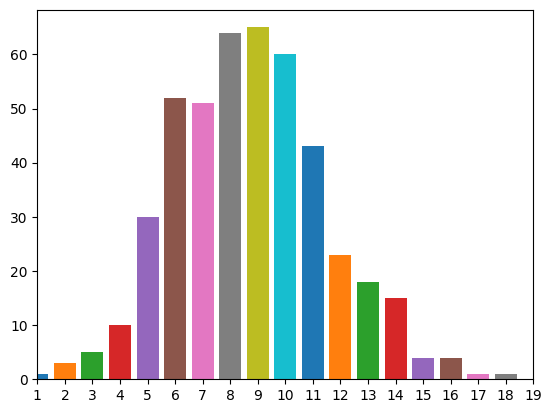

In [18]:
# 对应每一个人数，分别有多少道题被做
fig, ax = plt.subplots()
ax.set_xlim(1, 19)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
for i in range(1, 19):
    i_th_num = np.sum(num_list == i)
    ax.bar(i, i_th_num)

In [19]:
# 计算每道题的概率，即患者有多少可能预测该图是AE
# 设概率为预测 AE 的概率
predict_AE_prob_list = []
all_num = source_df.shape[0]

for i, num in enumerate(num_list):
    predict_AE_num: int = np.sum(source_df.iloc[:, i] == 2)
    predict_AE_prob = predict_AE_num / num
    
    # 随机真实数据
    # add_AE_num: int = get_add_AE_prediction_num(_predict_AE_prob, source_df.shape[0] - num)
    # predict_AE_prob = (predict_AE_num + add_AE_num) / all_num
    
    predict_AE_prob_list.append(predict_AE_prob)
predict_AE_prob_list = np.array(predict_AE_prob_list)

In [20]:
len(predict_AE_prob_list), predict_AE_prob_list[0], len(answer_list)

(450, 0.2857142857142857, 450)

In [21]:
print(pprint([i for i in zip(predict_AE_prob_list, num_list)]))

[(0.2857142857142857, 14),
 (0.5, 4),
 (0.3333333333333333, 12),
 (0.0, 6),
 (0.0, 10),
 (0.0, 12),
 (0.0, 9),
 (0.0, 12),
 (0.0, 6),
 (0.2, 5),
 (0.8, 10),
 (0.0, 11),
 (0.6666666666666666, 9),
 (0.6666666666666666, 6),
 (0.2, 5),
 (0.1, 10),
 (0.09090909090909091, 11),
 (0.0, 8),
 (0.6, 5),
 (0.2, 5),
 (0.0, 10),
 (0.2, 5),
 (0.3333333333333333, 12),
 (0.25, 8),
 (0.1, 10),
 (0.09090909090909091, 11),
 (0.0, 8),
 (0.4444444444444444, 9),
 (0.0, 7),
 (0.3333333333333333, 12),
 (0.8, 5),
 (0.7, 10),
 (0.7692307692307693, 13),
 (1.0, 10),
 (0.5714285714285714, 7),
 (0.8571428571428571, 7),
 (0.7777777777777778, 9),
 (0.3333333333333333, 6),
 (0.8, 10),
 (0.6923076923076923, 13),
 (0.2857142857142857, 7),
 (0.2857142857142857, 7),
 (0.5555555555555556, 9),
 (0.8, 10),
 (0.75, 8),
 (0.8888888888888888, 9),
 (1.0, 7),
 (0.9166666666666666, 12),
 (0.75, 8),
 (0.7142857142857143, 7),
 (0.8571428571428571, 7),
 (0.6666666666666666, 6),
 (0.9333333333333333, 15),
 (0.9090909090909091, 11),
 (0

In [22]:
roc_auc_score(answer_list, predict_AE_prob_list)

0.8933333333333333

In [23]:
fpr, tpr, thresholds = roc_curve(answer_list, predict_AE_prob_list, pos_label=1)
auc(fpr, tpr)

0.8933333333333333

In [27]:
mask = predict_AE_prob_list < 0.5

In [28]:
predict_result = np.ones(450)
predict_result[mask] = 0
print(predict_result, mask)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [29]:
accuracy_score(answer_list, predict_result)

0.8111111111111111

In [12]:
# df = pd.DataFrame(columns=['Label', 'Pred'])
# df['Label'] = answer_list
# df['Pred'] = predict_AE_prob_list
# df.to_csv('./resources/graphpad/inves_prob_2022_all.csv', index=False)